<a href="https://colab.research.google.com/github/ross-fisher/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [1]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things
2 + 2

4

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import norm, multivariate_normal
import math
import seaborn 
import array, random, time, copy
from deap import base, creator, benchmarks, tools, algorithms

In [0]:
# Some graphical setup
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# rc Set the current rc params. rc(group, **kwards)
# rc : rendering context
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = '\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

In [0]:
def plot_normal_sample(sample, mu, sigma):
  'Plots a histogram and the normal distribution corresponding to the parameters.'
  # plot a range of range of 4 std-devs each end
  x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100) 
  # pdf : probability density function
  plt.plot(x, norm.pdf(x, mu, sigma), 'b', lw=2)
  # density : normalized to form  a probabilty density
  plt.hist(sample, 30, density=True, alpha=0.2)

def rotate_sample(sample, angle=-45):
    '''Rotates a sample by `angle` degrees. 
      Makes a matrix then multiplies the vectors by that to get new rotated vector sequence.'''
    theta = (angle/180.) * np.pi
    rot_matrix = np.array([[np.cos(theta), -np.sin(theta)], 
                           [np.sin(theta), np.cos(theta)]])
    return sample.T.dot(rot_matrix).T

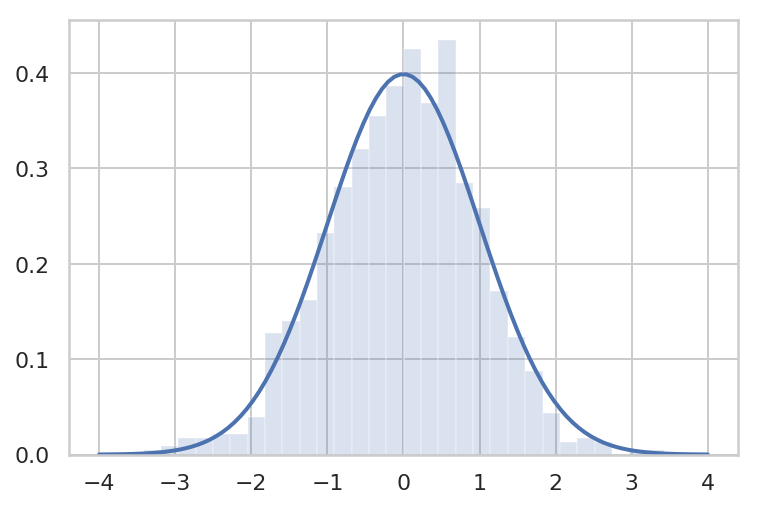

In [5]:
sample1 = np.random.normal(0, 1, 1000)
plot_normal_sample(sample1, 0, 1)

Covariance : measure of how much two random variables change together

In [6]:
sample_2d = np.array(list(zip(sample1, np.ones(len(sample1))))).T
sample_2d

array([[ 0.94405265, -1.77290489, -0.71068734, ..., -1.06395951,
        -1.23720073, -0.63183084],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

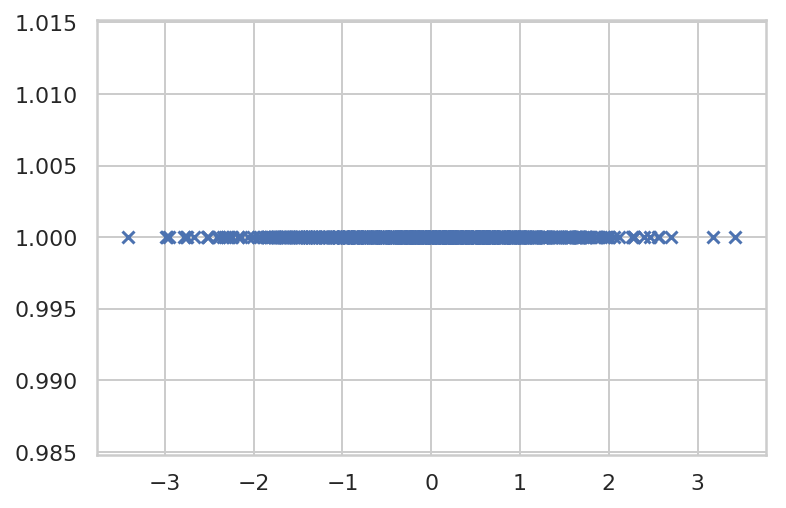

In [7]:
# [0,:] first row, [1,:] the ones row
plt.scatter(sample_2d[0,:], sample_2d[1,:], marker='x')

In [8]:
rot_sample = rotate_sample(sample_2d)
rot_sample

array([[-0.03956075, -1.96073985, -1.20963862, ..., -1.45943977,
        -1.58193981, -1.15387865],
       [ 1.37465281, -0.54652629,  0.20457495, ..., -0.0452262 ,
        -0.16772625,  0.26033491]])

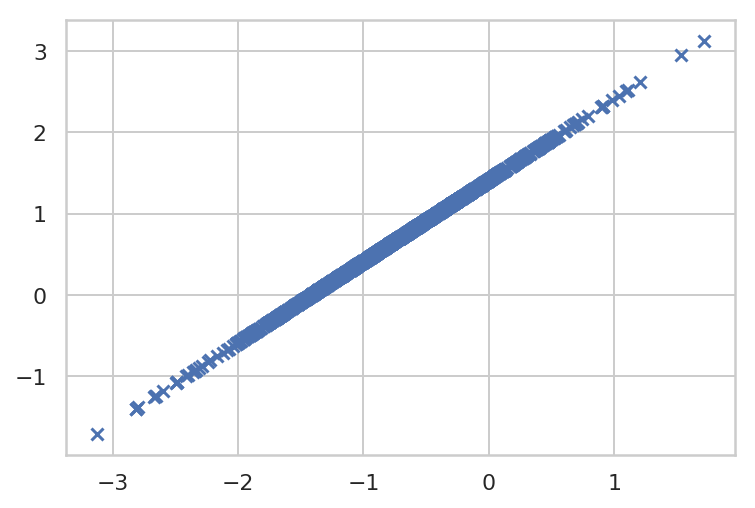

In [9]:
plt.scatter(rot_sample[0,:], rot_sample[1,:], marker='x')

In [10]:
# cov : gives the covariance matrix between the two variables (x y)
np.cov(rot_sample)

array([[0.47684861, 0.47684861],
       [0.47684861, 0.47684861]])

In [0]:
# a two-dimensional normally-ditributed variable
mu = [0,1] # mean at 0,1
# can be used to stretch, squish, adn rotate the 2d distribution it seems
cov = [[1,0], [0,0.2]] # would look like line above if all 1s. a dot if all 0s.
# multivariate_normal : generalization of gaussian distribution to higher dimensions,
# specified by its mean and covariance matrix.
sample = np.random.multivariate_normal(mu, cov, 1000).T

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


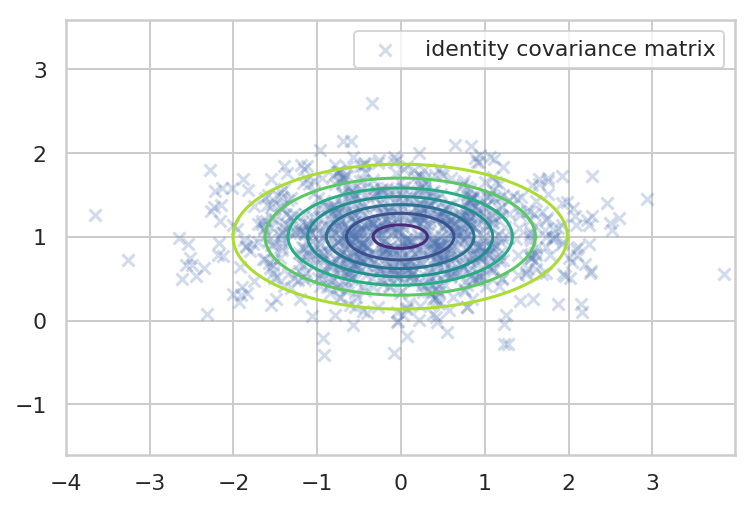

In [32]:
plt.scatter(sample[0], sample[1], marker='x', alpha=0.25, label='identity covariance matrix')

sample_mean = sample.mean(axis=1)
sample_cov = np.cov(sample)
estimated_x, estimated_y = np.random.multivariate_normal(sample_mean, sample_cov, 500).T
plt.legend()


# mgrid : mesh grid
x, y = np.mgrid[-4:4:.01, -1:3:.01]
# empty - unitialized matrix of a given shape
# not sure why it's needed
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
rv = multivariate_normal(sample_mean, sample_cov)
plt.contour(x, y, rv.pdf(pos), cmap=cm.viridis_r, lw=4)
plt.axis('equal'); 

# Makes an oval pattern of probability density, with the inner ovals being more dense

In [33]:
x[:4,:4] # corner piece of a mesh grid

array([[-4.  , -4.  , -4.  , -4.  ],
       [-3.99, -3.99, -3.99, -3.99],
       [-3.98, -3.98, -3.98, -3.98],
       [-3.97, -3.97, -3.97, -3.97]])

(-4.3995, 4.3895, -1.1995, 3.1895000000000002)

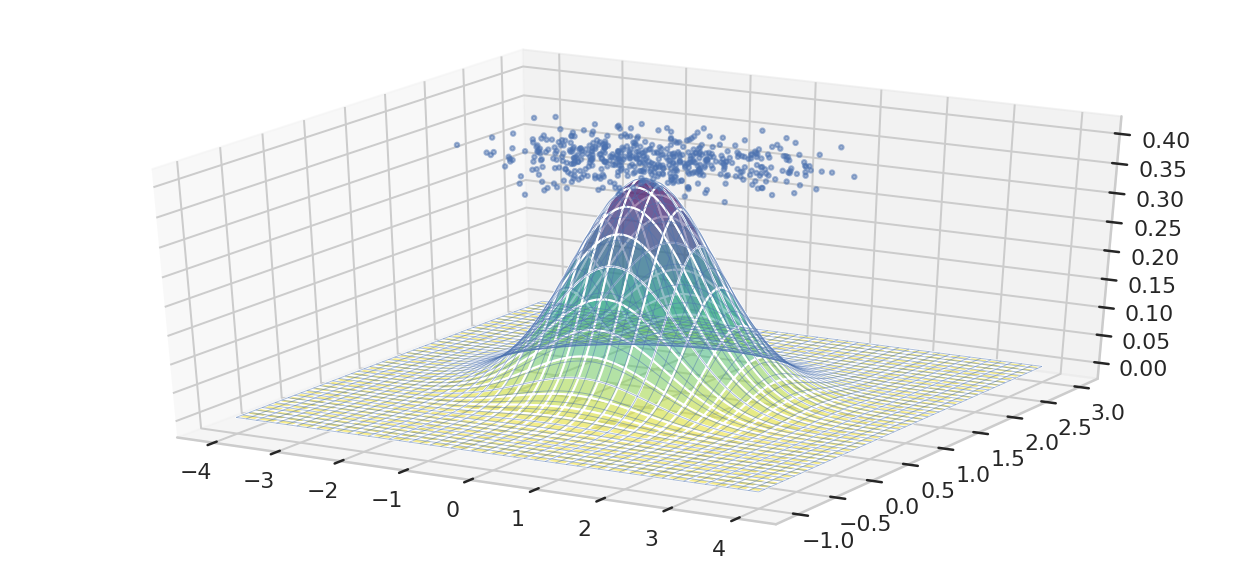

In [34]:
fig = plt.figure(figsize=(11,5))
# gca : get current axes
ax = fig.gca(projection='3d')
# viridis : certain type of color pallet that looks pretty good
# rstride : row stride
ax.plot_surface(x, y, rv.pdf(pos), cmap=cm.viridis_r, rstride=30, cstride = 10, linewidth = 1, alpha=0.5)
ax.plot_wireframe(x, y, rv.pdf(pos), linewidth=0.47, alpha=0.47) # makes it look cool with wireframe
ax.scatter(estimated_x, estimated_y, 0.4, marker='.', alpha=0.5)
ax.axis('tight')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




1. Used this notebook https://nbviewer.jupyter.org/github/lmarti/evolutionary-computation-course/blob/master/AEC.04%20-%20Evolutionary%20Strategies%20and%20Covariance%20Matrix%20Adaptation.ipynb and learned about reviewed some aspects of matplot lib and probabilities. 

2. Time management. I ended up spending too much time trying to remember and learn fully and I think maybe I should have just copied and messed with the interesting parts of the notebook rather than thinking I could make a neat project in this time frame while trying to learn everything.  I should probably reserve my full curiosity for when I'm not working towards an assignment. 

3. I felt like a learned a number of interesting regarding plotting and probability distributions. In one of the other notebooks I looked at on my assignment also helped me understand some principles about computability so I learned interesting things during this assignment.

4. I would like to get better at making visualizations visualizations so I would to further explore this notebook but I didn't got as far as I wanted to today.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.